In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#随机生成在区间[0.0，100.0]的100个点
def load_data():
    data = np.random.rand(100, 2)*100
    return data

In [20]:
#画出100个点的分布图
def show_fig(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0],data[:,1])
    plt.show()

In [21]:
#计算两点之间的欧氏距离
def cal_distance(p1,p2):
    return np.sqrt(np.sum(np.square(p1-p2)))

In [22]:
#随机选取k个点
def init_centroids(data,k):
    data = list(data)
    return random.sample(data,k)

In [23]:
#划分类簇
def divide(data,centroids):
    cluster = dict()
    k = len(centroids)
    for p in data:
        cluster_index = -1
        min_dis = float("inf")
        for index in range(k):
            c = centroids[index]
            dis = cal_distance(p,c)
            if dis < min_dis:
                min_dis = dis
                cluster_index = index
        if cluster_index not in cluster.keys():
            cluster[cluster_index] = []
        cluster[cluster_index].append(p)
    return cluster

In [24]:
#重新计算中心点
def update_centroids(cluster):
    new = []
    for i in cluster.keys():
        c = np.mean(cluster[i],axis=0)
        new.append(c)
    return new

In [25]:
#计算各个簇集合的均方误差
def cal_variance(centroids,cluster):
    res = 0.0
    for i in cluster.keys():
        c = centroids[i]
        dis = 0.0
        for p in cluster[i]:
            dis += cal_distance(p,c)
        res += dis
    return res

In [26]:
#画出聚类后100个点的分布图
def show_cluster(centroids,cluster):
    color_mark = ['or', 'ob', 'og', 'ok', 'oy', 'ow']
    centroid_mark = ['dr', 'db', 'dg', 'dk', 'dy', 'dw']
    for key in cluster.keys():
        plt.plot(centroids[key][0],centroids[key][1],
                centroid_mark[key],markersize=12)
        for c in cluster[key]:
            plt.plot(c[0],c[1],color_mark[key])
    plt.show()

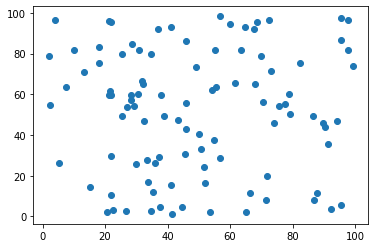

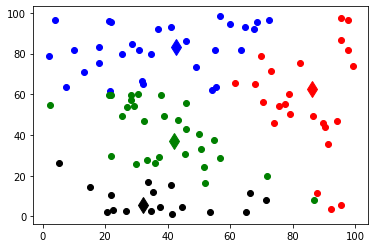

[array([86.09280262, 62.5469437 ]), array([42.67901773, 83.16900185]), array([42.18960431, 36.88031593]), array([32.16958138,  5.44303946])]




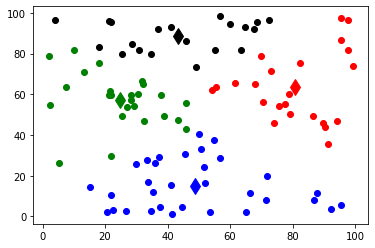

[array([80.82157501, 63.5134281 ]), array([48.90189754, 15.07340046]), array([24.91795943, 57.14470996]), array([43.32424025, 88.74086668])]


final result:



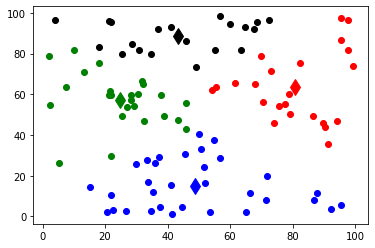

[array([80.82157501, 63.5134281 ]), array([48.90189754, 15.07340046]), array([24.91795943, 57.14470996]), array([43.32424025, 88.74086668])]


In [30]:
data = load_data()
#初始100个点的分布图
show_fig(data)
centroids = init_centroids(data,4)
cluster = divide(data,centroids)
new = cal_variance(centroids,cluster)
old = 1
times = 0
while (abs(new - old) >= 0.00001) and times < 10000:
    centroids = update_centroids(cluster)
    cluster = divide(data,centroids)
    old = new
    new = cal_variance(centroids,cluster)
    if times % 10 == 0:
        show_cluster(centroids,cluster)
        print(centroids)
        print("\n")
    times += 1
print("final result:\n")
show_cluster(centroids,cluster)
print(centroids)